### Documentation

This nodebook serves as the documentation and demonstraton for the functions contained in the MSXPY toolbox. 


The table below summarizes the functions which comprise MSXPY

| Function | Description |
| :--- | :--- | 
| MSXRunQual | Run a water quality simulation and extract results |
| GetNodeNameList | Create a list with all nodes |
| GetLinkNameList | Create a list with all links |
| GetSpeciesNameList | Create a list with all species |
| GetConstantNameList | Create a list with all constants |
| GetConstants | Extract the value of specific constants |
| GetInitialConcentration | Extract the value of the initial concentration of specefic species |
| SetConstants | Set the value of one or more constants |
| SetInitialConcentration | Set the value of the initial species concentration at one or more nodes |
| SetGlobalInitialConcentration | Set the value of an initial species concentration at all nodes and links |
| Network2DPlot | Create a figure showing the layout of the hydraulic model and chemical simulation results |
| MorrisWallEvaluate | Evaluate simulation from the Morris Method for wall species |




Import packages

In [1]:
#Import the packages

import os 
import sys

main_folder = os.path.dirname(os.getcwd())
sys.path.insert(0,main_folder+'\Function_Libraries')
#Set working directory
os.chdir(main_folder)


import numpy as np
import matplotlib.pyplot as plt
import epanet_toolkit as epa
import msx_toolkit as msx
import pandas as pd
import wntr
import MSXPY_toolkit as mpy
import pickle

Import .inp and .msx models

In [2]:

#Close any files that were already open
epa.ENclose()
msx.MSXclose()

#open the inp file

inp_file = r'INP_and_MSX_Files\Net1.inp'
epa.ENopen(inp_file,'report.rpt')
#open msx file
msx.MSXopen(r'INP_and_MSX_Files\Net1-NH2CL_JV_TOC.msx')

Change duration of model evaluation

In [3]:
#Number of days to run model
days=14

#0 for duration
epa.ENsettimeparam(0, int(days*24*3600))

### MSXRunQual

Runs an EPANET MSX simulation and saves simulation results to a dictionary, similar to how results are stored when using WNTR to run a hydraulic simulation
<br>

*NOTE*: Before a water quality simulation can be executed, a hydraulic model evaluation must be evaluated first, using the <code>MSXsolveH</code> function.

**Function Inputs**
<br>

<code>links</code>: Default: All links in the model. A list of links in the model for which the quality results should be extracted. By default, results from all links are extracted. An empty list signifies that no results from links will be extracted.
<br>
<code>nodes</code>: Default: All nodes in the model. A list of nodes in the model for which the quality results should be extracted. By default, results from all nodes are extracted. An empty list signifies that no results from nodes will be extracted.
<br>
<code>species</code>: Default: All species in the model. A list of species in the model for which the quality results should be extracted. By default, results from all species are extracted. 
<br>
<code>by_species</code>: Default: "yes"."yes" or "no". If "yes", the results dictionary will be structured by having the results of a dataframe for each species, and the columns of the dataframe will be each node or link. If "no", the results dictionary will be strudcutred by having a dataframe for each node/link, and each column will be a different species.
<br>
<code>t_start</code>: Default: 0. The time in the simulation in which simulation results should be begin to be extracted. For example, if a model is run for 14 days, but only the final 24-hour simulation results are needed, then the parameter t_start should be 13. This parameter only affects the output of results and not any parameters of the epanetmsx simulation.
<br>
<code>bin</code>:Default: no.  "yes" or "no". Default: "yes". If "yes", the model will be run by saving all results to a temporary binary file, which is read back into python. If "no", model results will be extracted directly from the model after each timestep. The resulting model simulation results are identical- this affects the method by which results are extracted and may affect the time required to complete a simulation. The code in the "yes" case was developed by Jon Buckhardt.


In [4]:
#Solve the hydraulics of the model
msx.MSXsolveH()  


#Run the reaction model
print('Running Sim')
#In this use, the function inputs "nodes" and "bin" are using the default entrie, thus not included in the 
#function call below
my_results=mpy.MSXRunQual(links=[],species=['cNH2CL','T'],by_species='yes',t_start=13)
print('Ending Sim')

Running Sim
Ending Sim


### GetNodeNameList

Returns a list of all nodes in the model

There are no inputs to this function

In [5]:
nodes=mpy.GetNodeNameList()
print(nodes)

['10', '11', '12', '13', '21', '22', '23', '31', '32', '9', '2']


### GetLinkNameList

Returns a list of all links in the model

There are no inputs to this function

In [6]:
links=mpy.GetLinkNameList()
print(links)

['10', '11', '12', '21', '22', '31', '110', '111', '112', '113', '121', '122', '9']


### GetSpeciesNameList

Returns a list of all species in the model

There are no inputs to this function

In [7]:
species=mpy.GetSpeciesNameList()
print(species)

['HOCL', 'TOTCL', 'NH3', 'TOTNH', 'NH2CL', 'NHCL2', 'NCL3', 'I', 'OCL', 'NH4', 'TOTCO', 'H', 'OH', 'CO3', 'HCO3', 'H2CO3', 'cNH3', 'cNH2CL', 'AGE', 'DOC1', 'DOC2', 'T']


### GetConstantNameList

Returns a list of all constants in the model

There are no inputs to this function

In [8]:
constants=mpy.GetConstantNameList()
print(constants)

['k1', 'k2', 'k3', 'k4', 'k6', 'k7', 'k8', 'k9', 'k10', 'k12', 'k13', 'k14', 'k11CO3', 'k11OCL', 'k11OH', 'kDOC1', 'kDOC2', 'AC1', 'AC2', 'AC3', 'KNH4', 'KHOCL', 'KH2CO3', 'KHCO3']


### GetConstants

GetConstants(con_get)

Returns an array containing the values of specified constants in the model

<code>con_get</code>: A list containing the IDs of the constants for which the values should be extracted

The sequence of values in the output array correspond to the sequence of constants in the <code>con_get</code> function input

In [9]:
con_vals=mpy.GetConstants(['k1','k3','kDOC2'])
print(con_vals)

[[4.2e+06]
 [2.8e+02]
 [1.8e+02]]


### GetInitialConcentration

GetInitialConcentration(node,species)

Returns the values of initial species concentrations

<code>node</code>: a string with the node ID of interest

<code>species</code>: A list with the species of interest

The sequence of values in the output array correspond to the sequence of species in the <code>species</code> function input


In [10]:
init_vals=mpy.GetInitialConcentration('9',['TOTNH','TOTCO'])
print(init_vals)

[[9.e-06]
 [4.e-03]]


### SetConstants

Sets constants within the MSX model to a desired value

SetConstants(con_get,given_constants)

<code>con_get</code>: A list containg the constants in the MSX model to be changed
<br>
<code>given_constants</code>: An array containing the desired values of the constants

The sequence of the values in the <code>given_constants</code> array corresponds to the sequence of constants in the list <code>con_get</code>

In [11]:
#Get the values of the K1 and K2 constants
cons=mpy.GetConstants(['k1','k2'])
print('The original values of k1 and k2 are: ' + str(cons[0]) + ' and ' +str(cons[1]))

#Increase values of k1 and k2 by a factor of 1.5
mpy.SetConstants(['k1','k2'],cons*1.5)

#Extract the modified values of the constants to show that they were changed
cons_mod=mpy.GetConstants(['k1','k2'])
print('The modified values of k1 and k2 are: ' + str(cons_mod[0]) + ' and ' +str(cons_mod[1]))



The original values of k1 and k2 are: [4200000.] and [2.1e-05]
The modified values of k1 and k2 are: [6300000.] and [3.15e-05]


### SetInitialConcentration

SetInitialConcentration(node, species, init_val)

Sets the inital concentration of species at a specified node

<code>node</code>: A string with the node ID of interest<br>
<code>species</code>: A list of the species to be changed<br>
<code>init_val</code>: An array of the values of the species to be changed


The sequence of the values in the <code>init_val</code> array corresponds to the sequence of species in the list <code>species</code>

In [12]:
#Get the initial concentration of TOTCO and TOTNH species at Node 9
init_vals=mpy.GetInitialConcentration('9',['TOTNH','TOTCO'])
print('The original concentrations of TOTNH and TOTCO are: ' + str(init_vals[0]) + ' and ' +str(init_vals[1]))

#Increase initial concentrations of TOTNH and TOTCO at node 9 by a factor of 2
mpy.SetInitialConcentration('9',['TOTNH','TOTCO'],init_vals*2)


#Get the initial concentration of TOTCO and TOTNH species at Node 9
mod_vals=mpy.GetInitialConcentration('9',['TOTNH','TOTCO'])
print('The modified concentrations of TOTNH and TOTCO are: ' + str(mod_vals[0]) + ' and ' +str(mod_vals[1]))



The original concentrations of TOTNH and TOTCO are: [9.e-06] and [0.004]
The modified concentrations of TOTNH and TOTCO are: [1.8e-05] and [0.008]


### SetGlobalInitialConcentration

SetGlobalInitialConcentration(species,init_val)

Sets the initial concentration of a species at all links and nodes in the model

<code>species</code>:A list of the species to be changed<br>
<code>init_val</code>: An array of the values of the species


In [13]:
#Change the pH to 7.25
mpy.SetGlobalInitialConcentration(['H'],np.array([10**-7.25]))

### Network2DPlot

Network2DPlot(network,color_var,size_var,title,nodes,min_scale,max_scale,show_inds)

Create a map of the network using the color of each node to represent one quantity, and another quantity represented by the size of each node.

<code>network</code>:WNTR class containing the hydraulic network
<br>
<code>color_var</code>: The attribute to be represented by the color of each node. An array, with length equal to the number of nodes. 
<br>
<code>size_var</code>: The attribute to be represented by the size of each node. An array, with length equal to the number of nodes. 
<br>
<code>title</code>: A string, which will be used as the title of the figure
<br>
<code>nodes</code>: A list containing the nodes to be included in the map of the network
<br>

For the variable to be expressed as the size of each node, the range of values of that variable are scaled between some minimum and maximum value of node size.
<br>
<code>min_scale</code>: Default: 30 An integer, representing the node size that should be used for the node with the minimum value of the size_var variable.
<br>
<code>max_scale</code>: Default: 80 An integer, representing the node size that should be used for the node with the maximum value of the size_var variable.
<br>
<code>show_inds</code>: Default: all indicies. An array containing the indicies of the nodes to be shown in the map. This is used to filter out nodes that are not desired to be expressed on the map.


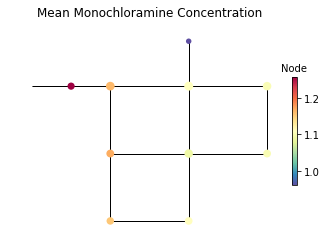

In [14]:
#Make a map of the mean concentrations with the standard deviation as the size

#Import wntr model to be used later for plot
wn = wntr.network.WaterNetworkModel(inp_file)

color_var=my_results['cNH2CL']['node'].mean()
size_var=my_results['cNH2CL']['node'].std()
title='Mean Monochloramine Concentration'
nodes=mpy.GetNodeNameList()
nodes.remove('9')
mpy.Network2DPlot(wn,color_var,size_var,title,nodes,min_scale=30,max_scale=80,show_inds=nodes)

### MorrisWallEvaluate

MorrisWallEvaluate(model_results,species)

Compute the values of mu_star and sigma for all parameters at all nodes and links within a WDN.

<code>model_results</code>: Dictionary of model results, with method of morris analysis. Import pickle file generated from Model_Morris_Run.py
<code>species</code>: A string containing the species of interest for which the values of mu_star and sigma should be analyzed. 


In [16]:

pickle_file_model=r'Examples_and_Templates\Pickle Files\example_morris.pkl'

#import model results from pickle file
with open(pickle_file_model,'rb') as pfile:
    model_results=pickle.load(pfile)

species='Xb'
    
morris_results, age= mpy.MorrisWallEvaluate(model_results,species)

Evaluating Node 1 of 11
Evaluating Node 2 of 11
Evaluating Node 3 of 11
Evaluating Node 4 of 11
Evaluating Node 5 of 11
Evaluating Node 6 of 11
Evaluating Node 7 of 11
Evaluating Node 8 of 11
Evaluating Node 9 of 11
Evaluating Node 10 of 11
Evaluating Node 11 of 11
Evaluating Link 1 of 13
Evaluating Link 2 of 13
Evaluating Link 3 of 13
Evaluating Link 4 of 13
Evaluating Link 5 of 13
Evaluating Link 6 of 13
Evaluating Link 7 of 13
Evaluating Link 8 of 13
Evaluating Link 9 of 13
Evaluating Link 10 of 13
Evaluating Link 11 of 13
Evaluating Link 12 of 13
Evaluating Link 13 of 13
